In [1]:
#imports

import pandas as pd
import numpy as np
import env
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
%matplotlib inline


In [2]:
df_telco = acquire.get_telco_data()

In [3]:
df_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
#columns to get dummies
#multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract_type, internet_service_type, payment_type
#churn change to int

In [5]:
def more_dummies(df):
    cols_to_dummify = ['multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies,' 'contract_type', 'internet_service_type', 'payment_type']

    for col in cols_to_dummify:
       df_telco_dummies = pd.get_dummies(cols_to_dummify)
    return df_telco_dummies
    

In [6]:
df_telco_dummies = more_dummies(df_telco)

In [7]:
#finish cleaning data, then split (train, validate, test), then explore on the train dataset

In [8]:
#split data
prepare.train_test_split(df_telco)

[      payment_type_id  internet_service_type_id  contract_type_id customer_id  \
 4967                3                         2                 3  6990-YNRIO   
 3491                2                         3                 1  4946-EDSEW   
 3450                3                         1                 3  4891-NLUBA   
 5682                1                         2                 2  8008-ESFLK   
 5740                2                         3                 2  8076-FEZKJ   
 ...               ...                       ...               ...         ...   
 4180                1                         1                 1  5909-ECHUI   
 5398                2                         3                 3  7608-RGIRO   
 6465                2                         1                 2  9150-HEPMB   
 103                 3                         2                 2  0186-CAERR   
 5232                1                         2                 1  7363-QTBIW   
 
       gender 

In [9]:
# sns.barplot(x = "monthly_charges", y = "churn", data = df_telco)
# this one would be useful once the dataset is split 

In [10]:
prepped_telco = prepare.prep_telco(df_telco)


In [11]:
prepped_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   monthly_charges                        7043 non-null   float64
 4   total_charges                          7043 non-null   float64
 5   gender_Male                            7043 non-null   uint8  
 6   partner_Yes                            7043 non-null   uint8  
 7   dependents_Yes                         7043 non-null   uint8  
 8   phone_service_Yes                      7043 non-null   uint8  
 9   paperless_billing_Yes                  7043 non-null   uint8  
 10  churn_Yes                              7043 non-null   uint8  
 11  mult

In [12]:
prepare.train_test_split(prepped_telco, prepped_telco.churn_Yes)

[     customer_id  senior_citizen  tenure  monthly_charges  total_charges  \
 5028  7067-KSAZT               1      65           106.25        6979.80   
 3815  5365-LLFYV               0       2            45.85         105.60   
 2100  3011-WQKSZ               0      19            20.00         377.55   
 3939  5543-QDCRY               0       4            56.40         234.85   
 2756  3923-CSIHK               1      50            71.05        3444.85   
 ...          ...             ...     ...              ...            ...   
 5636  7945-HLKEA               0      60            64.75        4039.50   
 4107  5804-LEPIM               1       2            70.35         139.05   
 3617  5130-YPIRV               0      62            72.00        4284.20   
 4277  6023-YEBUP               0       3           100.95         329.95   
 3950  5564-NEMQO               1       1            75.30          75.30   
 
       gender_Male  partner_Yes  dependents_Yes  phone_service_Yes  \
 502

In [13]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on churn_Yes.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn_Yes)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn_Yes)
    return train, validate, test


In [14]:
train, validate, test = split_data(prepped_telco)

In [15]:
train

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5310,7503-MIOGA,1,72,89.85,6697.35,0,1,0,1,1,...,1,0,1,0,1,0,0,0,0,0
3790,5329-KRDTM,1,72,77.35,5396.25,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4398,6199-IWKGC,1,46,100.25,4753.85,0,1,0,1,0,...,1,0,1,1,0,1,0,0,1,0
2635,3748-FVMZZ,0,4,40.05,162.45,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2986,4280-DLSHD,0,8,54.75,445.85,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,8809-RIHDD,0,72,103.40,7372.65,1,1,1,1,1,...,1,0,1,0,1,1,0,0,1,0
356,0523-VNGTF,1,52,50.50,2566.30,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2128,3058-HJCUY,0,41,102.60,4213.35,1,1,1,1,1,...,1,0,1,1,0,1,0,0,1,0
3586,5081-NWSUP,0,10,64.90,685.55,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [16]:
validate

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
720,1062-LHZOD,0,1,69.90,69.90,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
5832,8205-OTCHB,0,22,43.75,903.60,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
4378,6173-GOLSU,1,67,94.65,60790.00,1,1,0,1,1,...,1,0,1,0,0,1,0,1,0,0
5553,7817-OMJNA,0,14,20.40,275.70,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
482,0702-PGIBZ,0,4,101.70,364.55,1,0,1,1,1,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,6352-GIGGQ,0,67,88.80,5903.15,1,0,0,1,1,...,1,0,1,1,0,0,0,0,0,0
1602,2332-EFBJY,0,16,19.70,342.40,1,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
583,0856-NAOES,0,6,60.90,414.10,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
6134,8690-UPCZI,0,29,69.05,1958.45,1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,0


In [17]:
test

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3160,4531-AUZNK,0,51,95.15,5000.05,0,1,1,1,1,...,1,0,0,1,0,1,0,0,0,1
1577,2296-DKZFP,0,65,71.00,4386.20,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
6823,9692-TUSXH,0,18,96.05,1740.70,0,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0
3615,5129-JLPIS,0,25,105.50,2686.05,1,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0
882,1273-MTETI,1,4,88.85,372.45,0,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1597-FZREH,0,2,76.40,160.80,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
6441,9117-SHLZX,0,1,45.70,45.70,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5985,8441-SHIPE,0,67,25.60,1790.35,0,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
2452,3511-BFTJW,0,72,38.50,27630.00,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5310 to 6817
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3943 non-null   object 
 1   senior_citizen                         3943 non-null   int64  
 2   tenure                                 3943 non-null   int64  
 3   monthly_charges                        3943 non-null   float64
 4   total_charges                          3943 non-null   float64
 5   gender_Male                            3943 non-null   uint8  
 6   partner_Yes                            3943 non-null   uint8  
 7   dependents_Yes                         3943 non-null   uint8  
 8   phone_service_Yes                      3943 non-null   uint8  
 9   paperless_billing_Yes                  3943 non-null   uint8  
 10  churn_Yes                              3943 non-null   uint8  
 11  m

- - -

- - -

## Moving onto Exploratory Analysis and Statistical Testing

In [19]:
# use only the train dataset for analaysis and testing

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5310 to 6817
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3943 non-null   object 
 1   senior_citizen                         3943 non-null   int64  
 2   tenure                                 3943 non-null   int64  
 3   monthly_charges                        3943 non-null   float64
 4   total_charges                          3943 non-null   float64
 5   gender_Male                            3943 non-null   uint8  
 6   partner_Yes                            3943 non-null   uint8  
 7   dependents_Yes                         3943 non-null   uint8  
 8   phone_service_Yes                      3943 non-null   uint8  
 9   paperless_billing_Yes                  3943 non-null   uint8  
 10  churn_Yes                              3943 non-null   uint8  
 11  m

## Questions I want to explore:

1) Are customers with higher tenure less likely to churn?  
2) Are individual customers more likely to churn than those with a partner or dependents?
3) So higher monthly charges contribute to higher churn?
4) Do certain contract types have higher churn?
5) Does fiber optic service type  have lower churn?

1) Are customers with higher tenure less likely to churn?

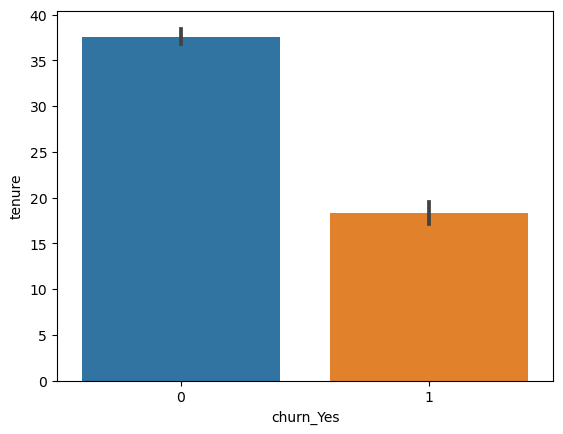

In [21]:
tenure_churn_barplot = sns.barplot(data = train, x = 'churn_Yes', y = 'tenure')
#this shows that higher tenure is less likely to churn
#newer customers/lower tenure more likely to churn

#continuous vs discrete
#t-test

Takeaway:

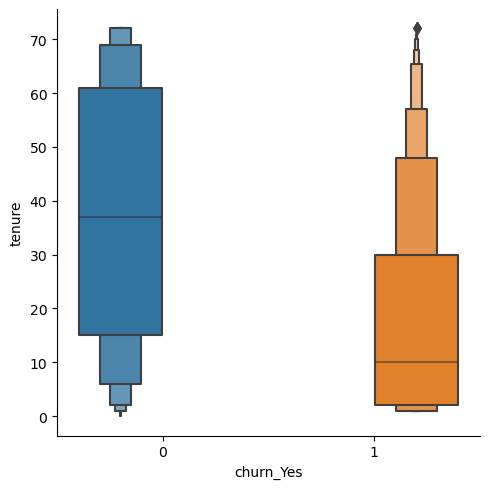

In [22]:
sns.catplot(data = train, x = 'churn_Yes', y = 'tenure', hue = 'churn_Yes', kind = 'boxen')

2) Are individual customers more likely to churn than those with a partner or dependents?

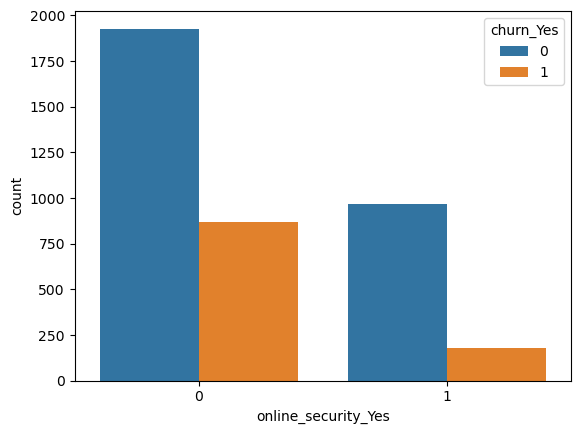

In [23]:
online_security_vs_churn = sns.countplot(train.online_security_Yes, hue = train.churn_Yes)
#discrete vs discrete
#chi square

<AxesSubplot:xlabel='online_security_Yes', ylabel='count'>

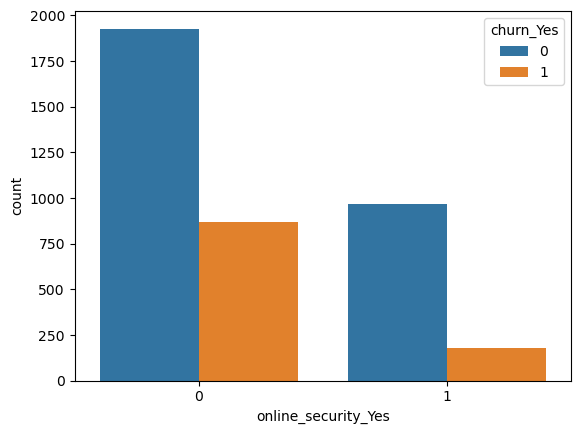

In [24]:
sns.countplot(train['online_security_Yes'], hue = train.churn_Yes)
#discrete vs discrete

3) So higher monthly charges contribute to higher churn?

<AxesSubplot:xlabel='tech_support_Yes', ylabel='count'>

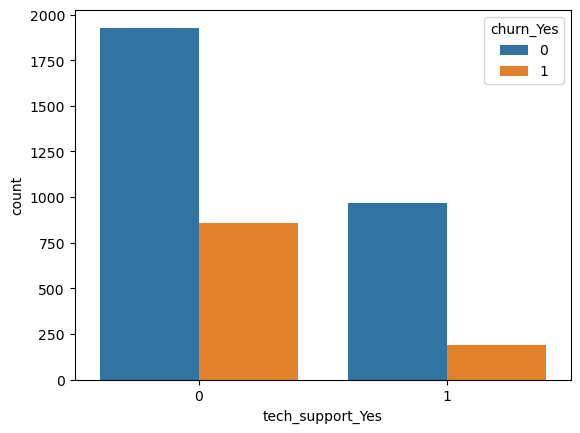

In [25]:
sns.countplot(train.tech_support_Yes, hue = train.churn_Yes)
#discrete vs discrete

- - -

## Questions I want to explore:



#### 1) Are customers with higher tenure less likely to churn?  
#### 2) Are individual customers more likely to churn than those with a partner or dependents?
#### 3) Do higher monthly charges contribute to higher churn?
#### 4) Do certain contract types have higher churn?
#### 5) Does fiber optic service type have lower churn?

- - -

#### 1) Are customers with higher tenure less likely to churn? 

<AxesSubplot:xlabel='churn_Yes', ylabel='tenure'>

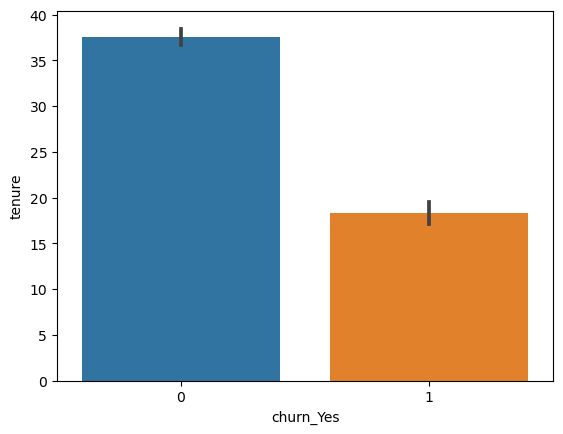

In [26]:
sns.barplot(data = train, x = 'churn_Yes', y = 'tenure')
# continuous vs discrete


Takeaway:

Customers who do not churn generally have much higher tenure
- - -

#### 2) Are individual customers more likely to churn than those with a partner?

<AxesSubplot:xlabel='churn_Yes', ylabel='partner_Yes'>

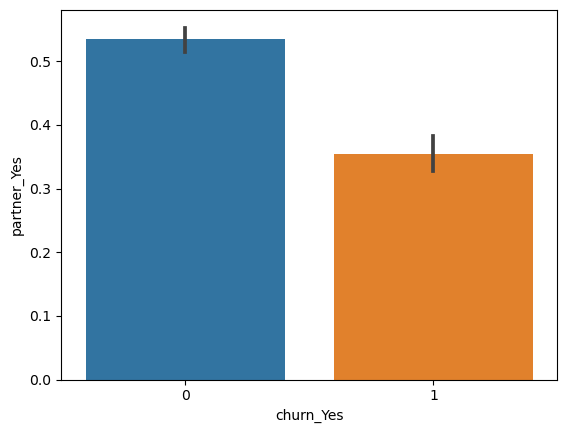

In [27]:
#individual customer more likely to churn than those with dependents or partners
sns.barplot(data = train, x = 'churn_Yes', y = 'partner_Yes')
#discrete vs discrete

#chi-2 test
Ho = there is no correlation between churn and having a partner
Ha = there is a correlation between churn and having a partner


In [28]:
observed_partner = pd.crosstab(train.churn_Yes, train.partner_Yes)
observed_partner

partner_Yes,0,1
churn_Yes,,
0,1349,1548
1,675,371


In [29]:
chi2, p, degf, expected = stats.chi2_contingency(observed_partner)
chi2, p, degf, expected

(98.57794056736955,
 3.124807670665349e-23,
 1,
 array([[1487.07278722, 1409.92721278],
        [ 536.92721278,  509.07278722]]))

In [30]:
print(f'chi^2 = {chi2:.4f}') 
print(f'p     = {p:.30f}')

chi^2 = 98.5779
p     = 0.000000000000000000000031248077


<AxesSubplot:xlabel='partner_Yes', ylabel='count'>

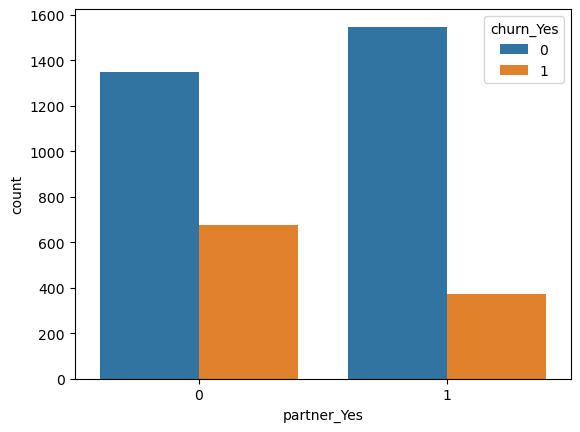

In [31]:
sns.countplot(data=train, x='partner_Yes', hue = 'churn_Yes')

Takeaway:

This shows that customers with a partner are less likely to churn
After performing a chi2 test, strong relationship between having a partner and not churning has been confirmed
- - -

<AxesSubplot:xlabel='dependents_Yes', ylabel='count'>

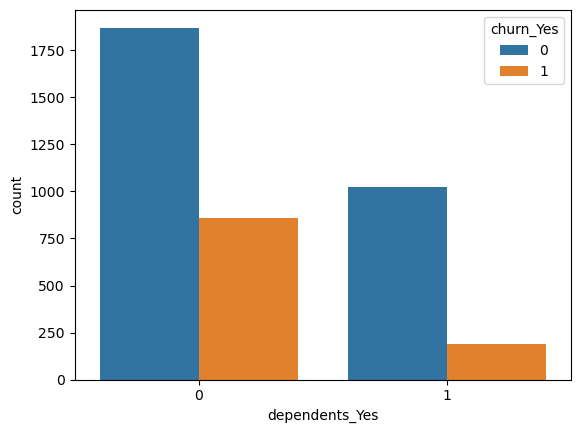

In [32]:
sns.countplot(data=train, x='dependents_Yes', hue = 'churn_Yes')

Takeaway:

Similar to customers with partners, customers with dependents are less likely to churn.
- - -

#### 3) Do higher monthly charges contribute to higher churn?

<AxesSubplot:xlabel='churn_Yes', ylabel='monthly_charges'>

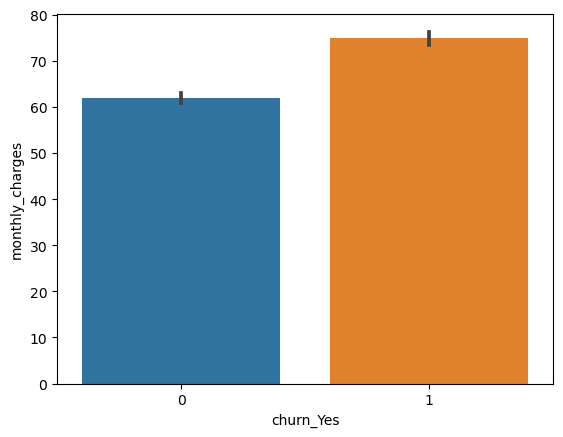

In [33]:
sns.barplot(data = train, x = 'churn_Yes', y = 'monthly_charges')

<AxesSubplot:xlabel='churn_Yes', ylabel='monthly_charges'>

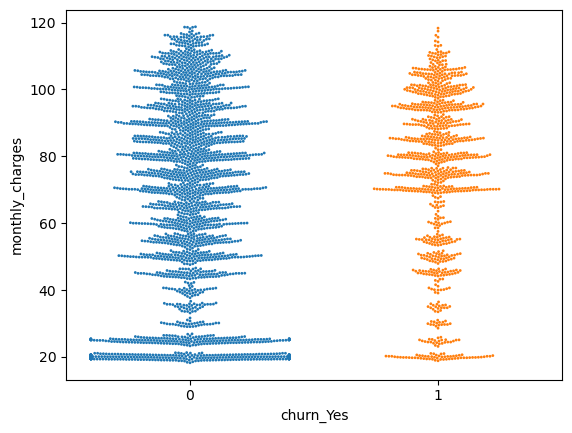

In [34]:
sns.swarmplot(data=train, x='churn_Yes', y='monthly_charges', size = 2)

In [35]:
#Do stats test for monthly_charges to churn
#continuous vs discrete
#t-test

Stats testing

- Be sure you are using the correct statistical test for the type of variables you are testing
- Be sure that you are not violating any of the assumptions for the statistical test you are choosing
- Your notebook should run and produce the results of the test you are using (This may be done through imports)
- Include an introduction to the kind of test you are doing
- Include the Ho and Ha for the test
- Include the alpha you are using
- Include the readout of the p-value for the test
- Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

Ho = monthly charges has no affect on churn
Ha = monthly charges does have an affect on churn

In [36]:
alpha = .05
#set alpha

In [37]:
train.churn_Yes.value_counts()
#verifying sample is large enough
#it is large enough

0    2897
1    1046
Name: churn_Yes, dtype: int64

Takeaway:

Customers with lower monthly charges are less likely to churn.
- - -

#### 4) Do certain contract types have higher churn?

<AxesSubplot:xlabel='churn_Yes', ylabel='contract_type_One year'>

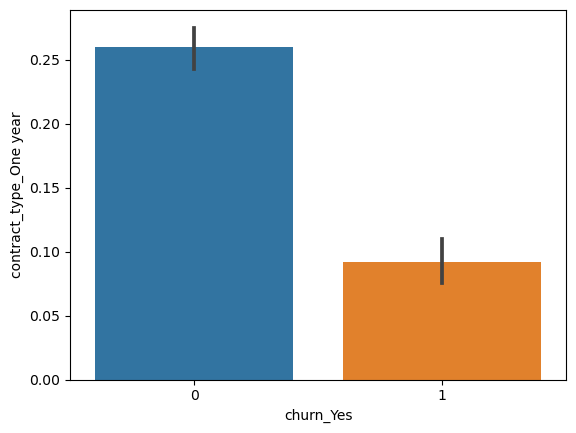

In [38]:
sns.barplot(data = train, x = 'churn_Yes', y = 'contract_type_One year')

<AxesSubplot:xlabel='churn_Yes', ylabel='count'>

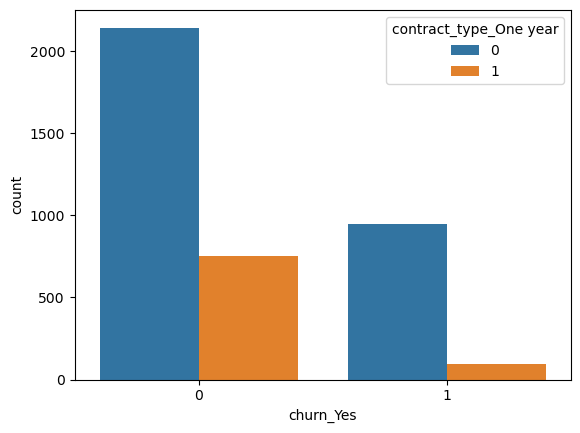

In [39]:
sns.countplot(data = train, x = 'churn_Yes', hue = 'contract_type_One year')

In [40]:
# sns.barplot(data = train, x = 'churn_Yes', y = 'contract_type_Two year')

<AxesSubplot:xlabel='churn_Yes', ylabel='count'>

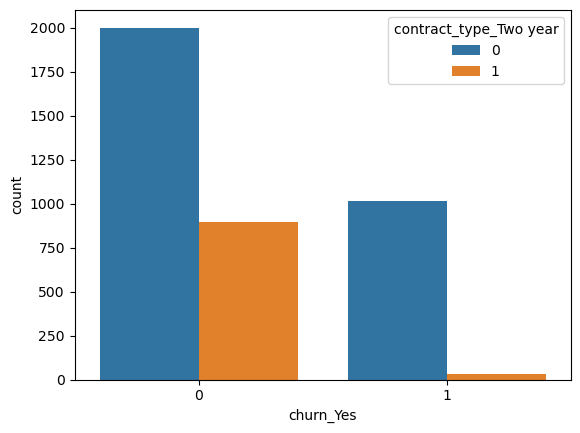

In [41]:
sns.countplot(data = train, x = 'churn_Yes', hue = 'contract_type_Two year')

#Stats test for contract_types

Ho = there is no relationship between two year contract and churn

Ha = There is a correlation between two year contact and churn



In [42]:
observed_contract_2_Year = pd.crosstab(train['contract_type_Two year'], train.churn_Yes)

In [43]:
observed_contract_2_Year

churn_Yes,0,1
contract_type_Two year,,
0,2002,1017
1,895,29


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed_contract_2_Year)
chi2, p, degf, expected

(337.16221680297303,
 2.6478708937714996e-75,
 1,
 array([[2218.11894497,  800.88105503],
        [ 678.88105503,  245.11894497]]))

Takeaway:

Two year contracts have lower churn than one year contracts

After performing chi2 test, can confirm there is a correlation between 2 year contract type and churn
- - -

#### 5) Does fiber optic service type have lower churn?

<AxesSubplot:xlabel='churn_Yes', ylabel='count'>

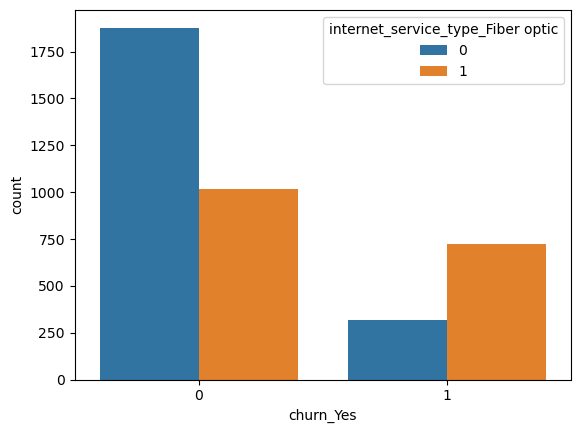

In [45]:
sns.countplot(data = train, x = 'churn_Yes', hue = 'internet_service_type_Fiber optic')

In [46]:
# Do stats test
#chi2 on having fiber optic



Ho = Service type fiber optic has no relatioship with churn 

Ha = Service type fiber optic is related to churn

In [47]:
observed_Fiber_Optic = pd.crosstab(train['internet_service_type_Fiber optic'], train.churn_Yes)
observed_Fiber_Optic

churn_Yes,0,1
internet_service_type_Fiber optic,,
0,1878,320
1,1019,726


In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observed_Fiber_Optic)
chi2, p, degf, expected

(363.68055827796593,
 4.447993420103704e-81,
 1,
 array([[1614.91402485,  583.08597515],
        [1282.08597515,  462.91402485]]))

Takeaway:

<AxesSubplot:xlabel='churn_Yes', ylabel='count'>

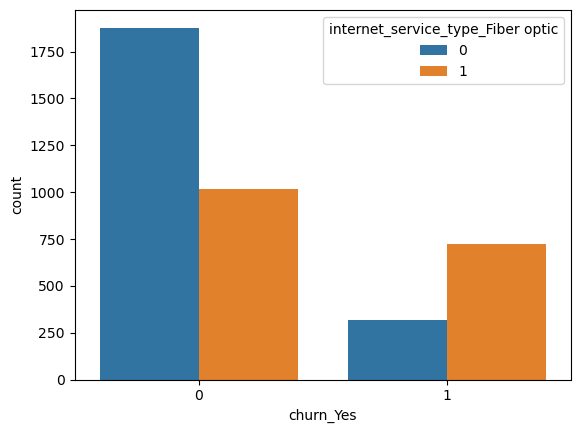

In [49]:
sns.countplot(data = train, x = 'churn_Yes', hue = 'internet_service_type_Fiber optic')

Takeaway:

### sending train, validate and test datasets from exploration to csv to use in a different scratch notebook for modeling

In [50]:
train.to_csv('Telco_Train_CSV.csv')
validate.to_csv('Telco_Validate_CSV.csv')
test.to_csv('Telco_Test_CSV.csv')
